Exercise 1  

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under $5000.” The highest range includes respondents who made “$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 106, or one million dollars.

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [2]:
import hinc

In [3]:
cps = hinc.ReadData()

In [4]:
cps

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640
5,29999.0,6740,36943,0.301679
6,34999.0,6354,43297,0.353566
7,39999.0,5832,49129,0.401191
8,44999.0,5547,54676,0.446488
9,49999.0,5254,59930,0.489392


In [5]:
import hinc2

In [6]:
cps = cps.replace(np.inf,1e6)

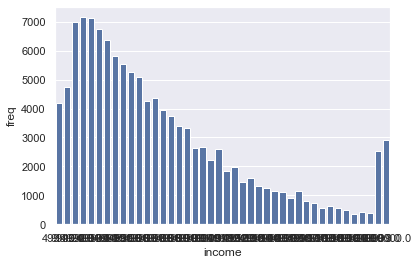

In [7]:
sns.barplot(cps.income,cps.freq,color='b')

In [24]:
log_sample = hinc2.InterpolateSample(cps)

/Users/drewhibbard/Documents/Pre Work/ThinkStats2/code/hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_lower[0] = 3.0
/Users/drewhibbard/Documents/Pre Work/ThinkStats2/code/hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_upper[41] = log_upper


In [25]:
sample = np.power(10,log_sample)

In [36]:
mean, std = (np.mean(sample), np.std(sample))
mean, std

(74278.7075311872, 93946.92996347835)

In [27]:
np.median(sample)

51226.93306562372

In [28]:
# mean is greater than median, skewness should be positive
stats.skew(sample)

4.949920244429584

In [40]:
# fraction of households below the mean
stats.percentileofscore(sample,mean)

66.00058795668718

The value chosen for the upper income bound has a significant effect on the distribution of the data.  For example if we chose 10M instead of 1M, the mean and skewness would greatly increase, with the median remaining the same as before.